# By: Thomas Isola
## Class: PUI 2018
## HW #10 Assignment 2

In [1]:
# Import packages
import statsmodels.formula.api as smf
import pylab as pl
import pandas as pd
import urllib.request as urllib
import shutil
import geopandas as gpd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Check if PUIdata exists
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ti582/PUIdata


In [3]:
# Import NYC Energy Consumption data
energyURL = 'https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD'
eData = urllib.urlretrieve(energyURL,'eData.csv')
currentPath = os.getcwd()
newPath = os.getenv('PUIDATA')
shutil.move('%s/eData.csv'%currentPath, '%s/eData.csv'%newPath)
eData = pd.read_csv('%s/eData.csv'%newPath)

In [4]:
# Import pluto data
plutoURL = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_18v1.zip'
if(os.path.isfile('%s/MNMapPLUTO.shp'%newPath)):
    print("File in place. Continue")
else:    
    urllib.urlretrieve(plutoURL, "pluto.gz")
    !unzip -d $PUIDATA pluto.gz

File in place. Continue


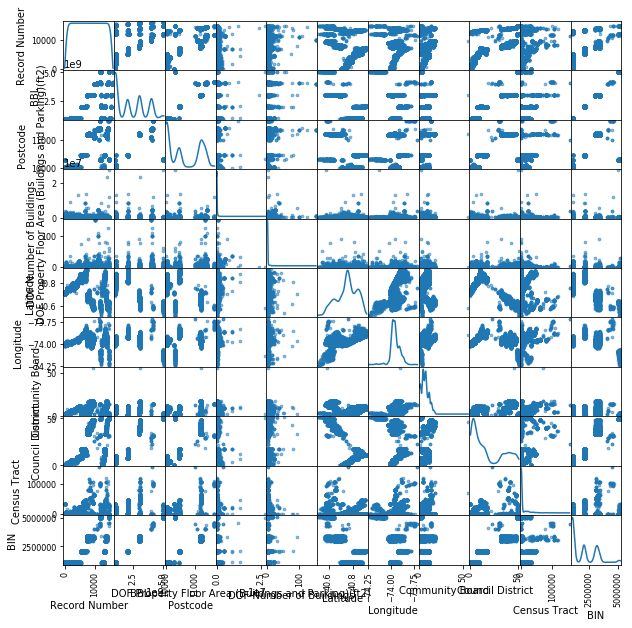

In [5]:
# Plot the energy data as a scatter matrix
sfig = pd.scatter_matrix(eData, s=30, figsize=(10, 10), diagonal='kde')

**Figure 1**: The plot above is a matrix of plots showing each variable plotted against each other variable in the dataframe. The diagonals represent the variable plotted against itself, which in this case are KDE plots. The data comes from NYC Open Data and represents energy and water data for the ity of New York. Many of the plot do not appear to show a correlation, however, by visual observation I would say about a quarter of the plots show a potential linear relationship. 

In [6]:
# Convert pluto data to a geodataframe
b_units = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/MNMapPLUTO.shp")

In [7]:
# Display the energy data columns
eData.columns

Index(['Record Number', 'BBL', 'Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Postcode',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings',
       'Latitude', 'Longitude', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'NTA'],
      dtype='object')

In [8]:
# Remove unecessary data from energy data
cols = [0,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31]
eData2 = eData.drop(eData.columns[cols], axis=1)
eData2.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,1.000410e+09,NaN,918919
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000


In [9]:
# Display the pluto columns
b_units.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCent',
       'HealthArea', 'SanitBoro', 'SanitDistr', 'SanitSub', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone',
       'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName',
       'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront',
       'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode',
       'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2010', 'XCo

In [10]:
b_units.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_area,SHAPE_len,geometry
0,MN,1545,52,108,138,4000,02,5,10028,E022,...,0.000000e+00,None,1,None,None,18V1,0,2867.154705,260.428942,"POLYGON ((997277.2344360352 221816.0936279297,..."
1,MN,723,7501,104,93,6000,02,3,10001,E003,...,1.007230e+09,11/30/2006,1,None,None,18V1,7,10907.639931,417.764545,"POLYGON ((984164.5626220703 211846.0704345703,..."
2,MN,1680,48,111,170,5000,04,8,10029,E091,...,0.000000e+00,None,1,1,1,18V1,0,2665.033424,256.893308,"POLYGON ((1000742.195800781 227910.6640014648,..."
3,MN,1385,32,108,130,2003,02,4,10021,E039,...,0.000000e+00,None,1,None,None,18V1,0,15302.920914,505.033271,"POLYGON ((994007.6885986328 219880.4284057617,..."
4,MN,1197,27,107,169,5000,03,6,10024,E074,...,0.000000e+00,None,1,None,None,18V1,0,4374.612456,295.652483,"POLYGON ((992273.6849975586 224863.4904174805,..."


In [11]:
# Remove unecessary data from pluto data
cols1 = list(range(0,46))
b_units2 = b_units.drop(b_units.columns[cols1], axis=1)
cols2 = list(range(2,15))
b_units2.drop(b_units2.columns[cols2], axis=1, inplace=True)
cols3 = list(range(3,12))
b_units2.drop(b_units2.columns[cols3], axis=1, inplace=True)
cols4 = list(range(4,22))
b_units2.drop(b_units2.columns[cols4], axis=1, inplace=True)

b_units2.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL,geometry
0,16,18,1920,1.015450e+09,"POLYGON ((997277.2344360352 221816.0936279297,..."
1,50,50,1914,1.007238e+09,"POLYGON ((984164.5626220703 211846.0704345703,..."
2,10,10,1910,1.016800e+09,"POLYGON ((1000742.195800781 227910.6640014648,..."
3,29,32,1928,1.013850e+09,"POLYGON ((994007.6885986328 219880.4284057617,..."
4,26,26,1900,1.011970e+09,"POLYGON ((992273.6849975586 224863.4904174805,..."


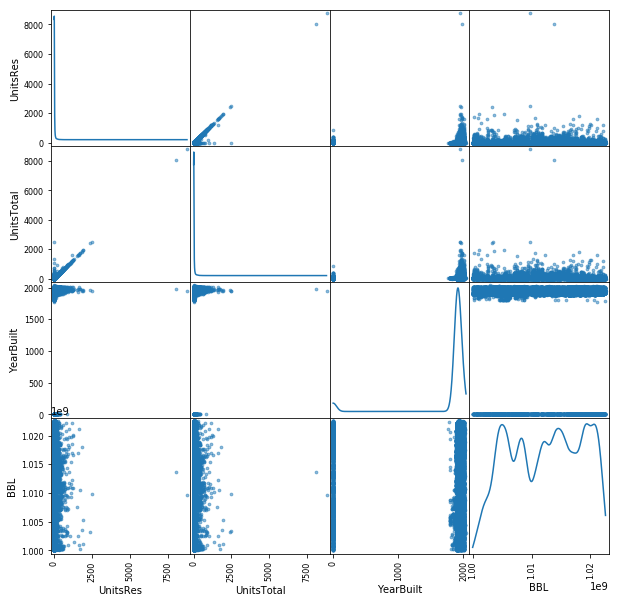

In [12]:
# Plot the pluto data as a scatter matrix
sfig = pd.scatter_matrix(b_units2, s=30, figsize=(10, 10), diagonal='kde')

**Figure 2**: The plot above is a matrix of plots showing each variable plotted against each other variable in the dataframe. The diagonals represent the variable plotted against itself, which in this case are KDE plots. The data is the MapPLUTO data from the NYC.gov website. It represents land use and geographic data for the New York tax lots. A couple plots above show a potential linear relationship, while the rest appear to show no immediately apparent correlation.

In [13]:
# Convert the 'Site EUI' column to a numerical type and check it worked
eData2['Site EUI(kBtu/ft2)'] = pd.to_numeric(eData2['Site EUI(kBtu/ft2)'], errors='coerce')
eData2['Site EUI(kBtu/ft2)'].astype(float)[:10], b_units2.BBL.astype(float)[:10]

(0   NaN
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 6   NaN
 7   NaN
 8   NaN
 9   NaN
 Name: Site EUI(kBtu/ft2), dtype: float64, 0    1.015450e+09
 1    1.007238e+09
 2    1.016800e+09
 3    1.013850e+09
 4    1.011970e+09
 5    1.002360e+09
 6    1.008370e+09
 7    1.001960e+09
 8    1.022240e+09
 9    1.011270e+09
 Name: BBL, dtype: float64)

In [14]:
# Check that the conversion worked
print ("number of missing energy observations:", np.isnan(eData2['Site EUI(kBtu/ft2)']
                                                          .astype(float)).sum())

number of missing energy observations: 4623


In [15]:
# Check that the conversion worked
print ("fraction of missing energy observations: %.2f"%(np.isnan(eData2['Site EUI(kBtu/ft2)']
                            .astype(float)).sum() / len(eData2['Site EUI(kBtu/ft2)'])))

fraction of missing energy observations: 0.29


In [16]:
# Merge the datasets as a geodataframe and as a dataframe 
mergedGPD = b_units2.merge(eData2,on='BBL')
mergedGPD.rename(index=str, columns={'Reported Property Floor Area (Building(s)) (ft²)': 
                                     'Reported Property Floor Area'}, inplace=True)
merged = pd.merge(b_units2,eData2,on='BBL')
merged.rename(index=str, columns={'Reported Property Floor Area (Building(s)) (ft²)': 
                                     'Reported Property Floor Area'}, inplace=True)
merged.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL,geometry,Site EUI(kBtu/ft2),Reported Property Floor Area
0,50,50,1914,1.007238e+09,"POLYGON ((984164.5626220703 211846.0704345703,...",68.7,95844
1,29,32,1928,1.013850e+09,"POLYGON ((994007.6885986328 219880.4284057617,...",87.4,206989
2,72,72,1923,1.021740e+09,"POLYGON ((1004080.155029297 252930.9956054688,...",140.4,52920
3,107,108,1931,1.008830e+09,"POLYGON ((989337.639831543 209686.7838134766, ...",96.5,98359
4,134,138,1910,1.008570e+09,"POLYGON ((988035.3540039062 210290.9854125977,...",36.4,154000


In [17]:
# Here I remove values that correspond to 0
# because in my opinion, it does not make sense to have 0 area
merged['Reported Property Floor Area'] = [NaN if x 
                                          == 0 else x for x in merged['Reported Property Floor Area']]

## Plot the data as a choropleth for the 2 quantities of interest: number of units and energy consumed energy

In [18]:
# Convert columns to logarithmic values
mergedGPD['Reported Property Floor Area'] = pd.to_numeric(mergedGPD['Reported Property Floor Area'],
                                                         errors='coerce')
mergedGPD['logarea'] = log(mergedGPD['Reported Property Floor Area'])
mergedGPD['lognrg'] = log(mergedGPD['UnitsTotal'])

In [19]:
# Here I remove values that correspond to -inf
# because in my opinion, it does not make sense to include those values
mergedGPD['lognrg'] = [0 if x == -inf else x for x in mergedGPD['lognrg']]

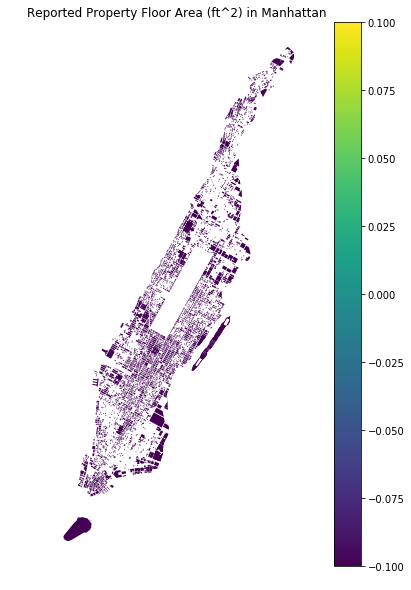

In [20]:
# Plot the energy consumed
plot1 = mergedGPD.plot(column='logarea', figsize=(10,10), cmap='viridis', alpha=1,
                       linewidth=0.1, legend=True, k=10)
plot1.set_title('Reported Property Floor Area (ft^2) in Manhattan ')
plot1.set_axis_off()

**Figure 3**: Above is a plot of the reported floor area (ft^2) of the buildings in Manhattan. More specifically, it is a plot of the natural logarithim of the reported floor area values, which is why the values range between -0.100 and 0.100. The dataset comes from data on energy consumption from the city of NY. It is difficult to distinguish trends from the plot since everything appears to be in the -0.100 to -0.075 range and is therefore a similar color.

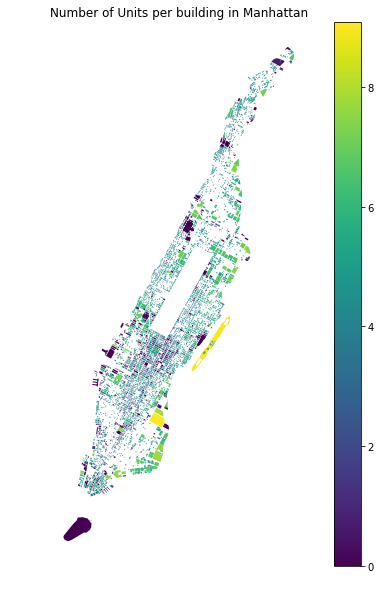

In [21]:
# Plot the number of units
plot2 = mergedGPD.plot(column='lognrg', figsize=(10,10), alpha=1,
                       linewidth=0.1, legend=True, k=10)
plot2.set_title('Number of Units per building in Manhattan')
plot2.set_axis_off()

**Figure 4**: Above is a plot of the number of units (ft^2) in the buildings in Manhattan. More specifically, it is a plot of the natural logarithim of the number of units, which is why the values range between 0 and 9. The dataset comes from the NYC PLUTO dataset. Most of the units are in the 4-6 range, which seems reasonable since this corresponds to about a hundred units. There are various places with very low number of units, such as the coastlines and governor's island, which makes sense.

In [22]:
merged['Reported Property Floor Area'] = pd.to_numeric(merged['Reported Property Floor Area'],
                                                         errors='coerce')

In [23]:
# Obtain total energy per building
merged['nrg'] = merged['Reported Property Floor Area'] * merged['Site EUI(kBtu/ft2)']

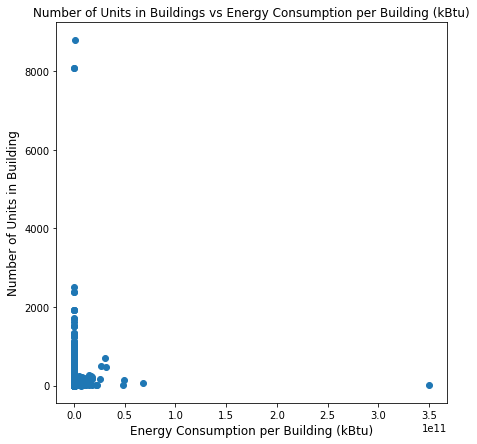

In [24]:
# Plot energy consumption per building vs number of units in building
plot3 = pl.figure(figsize=(7,7)).add_subplot(111);
plot3.scatter(merged['nrg'], merged['UnitsTotal']);
plot3.set_title('Number of Units in Buildings vs Energy Consumption per Building (kBtu)');
plot3.set_xlabel('Energy Consumption per Building (kBtu)', fontsize=12);
plot3.set_ylabel('Number of Units in Building', fontsize=12);

**Figure 5**: Above is a plot of the number of units in building vs energy consumption per building (kBtu). Many of the points lie in the lower left corner of the plot with a few outliers. Therefore, as per the instructions in the provided skeleton notebook, I will make another plot by "zooming in".

(0, 1000)

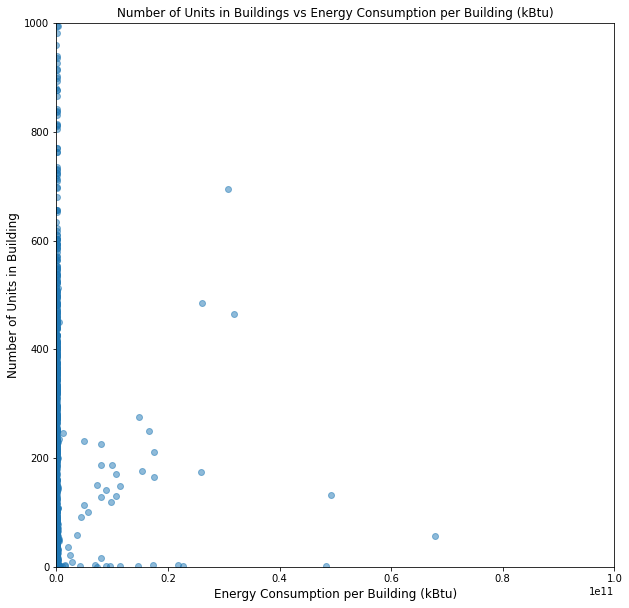

In [25]:
# Plot energy consumption per building vs number of units in building
plot4 = pl.figure(figsize=(10,10)).add_subplot(111);
plot4.plot(merged['nrg'], merged['UnitsTotal'],'o',alpha=0.5);
plot4.set_title('Number of Units in Buildings vs Energy Consumption per Building (kBtu)');
plot4.set_xlabel('Energy Consumption per Building (kBtu)', fontsize=12);
plot4.set_ylabel('Number of Units in Building', fontsize=12);
plot4.set_xlim(0,1e11)
plot4.set_ylim(0,1000)

**Figure 6**: The data plotted in Figure 5 with limits set on the x-axis (0 to 1x10^11) and limits set on the y-axis (0 to 1000). At this level of zoom, the trend in the data starts to become more apparent but further investigation is needed.

## Plot both NRG vs Units total and Units total vs NRG, both in log space

In [26]:
# Filtering out the data outside of the range: energy between (1000,1e10) and units between (1,1000)
# as per the skeleton notebook instructions
merged2 = merged[((merged.nrg > 1000) & (merged.nrg < 1e10))]
merged2 = merged2[((merged2.UnitsTotal >= 1) & (merged2.UnitsTotal <= 1000))]

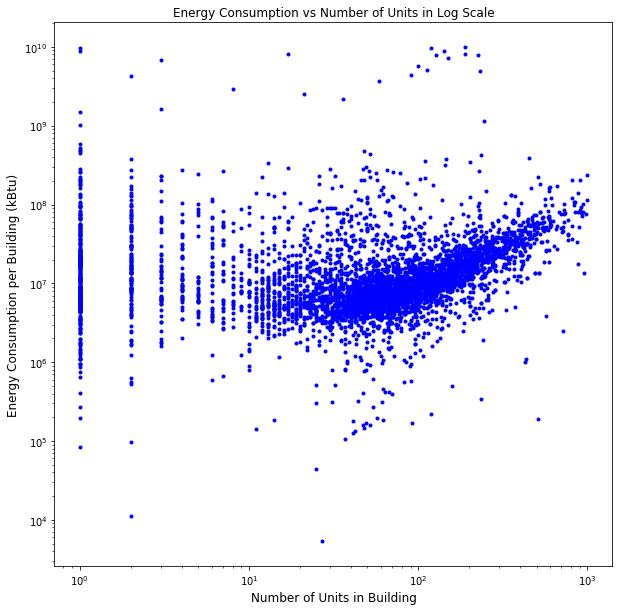

In [27]:
# Plot energy consumption per building vs number of units in building
plot5 = pl.figure(figsize=(10,10)).add_subplot(111);
plot5.loglog(merged2['UnitsTotal'], merged2['nrg'],'b.');
plot5.set_title('Energy Consumption vs Number of Units in Log Scale');
plot5.set_xlabel('Number of Units in Building', fontsize=12);
plot5.set_ylabel('Energy Consumption per Building (kBtu)', fontsize=12);

**Figure 6**: A plot of energy consumed vs number of units in building on a log scale. The number of units is plotted on the x-axis and energy consumed is plotted on the y-axis. There appears to be a parabolic trend.

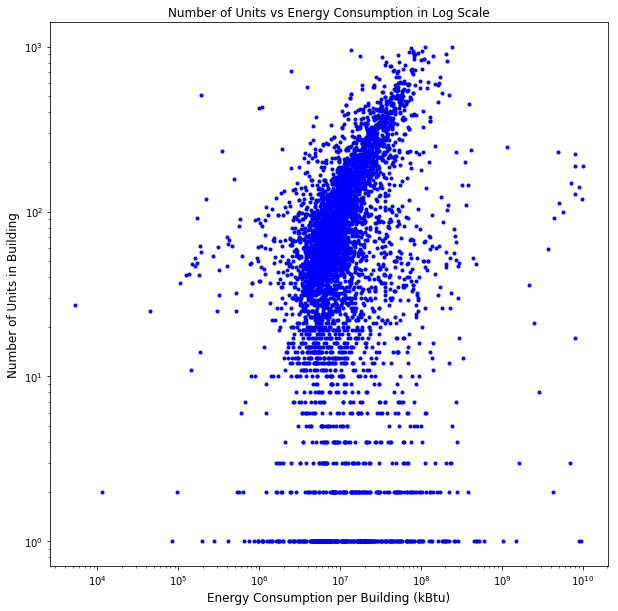

In [28]:
# Plot energy consumption per building vs number of units in building
plot6 = pl.figure(figsize=(10,10)).add_subplot(111);
plot6.loglog(merged2['nrg'], merged2['UnitsTotal'],'b.');
plot6.set_title('Number of Units vs Energy Consumption in Log Scale');
plot6.set_xlabel('Energy Consumption per Building (kBtu)', fontsize=12);
plot6.set_ylabel('Number of Units in Building', fontsize=12);

**Figure 7**: A plot of energy consumed vs number of units in building on a log scale. The energy consumed is plotted on the x-axis and number of units is plotted on the y-axis. There appears to be a parabolic trend.

## Fit the data with a line in log space:

### Units vs Energy

In [29]:
# Perform the linear fit calculations
x = log10(merged2['nrg'])
y = log10(merged2['UnitsTotal'])
x2 = sm.add_constant(x)
smfit = smf.OLS(y, x2).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     93.29
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           7.05e-22
Time:                        23:19:12   Log-Likelihood:                -4897.2
No. Observations:                4928   AIC:                             9798.
Df Residuals:                    4926   BIC:                             9811.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3466      0.138      2.513      0.012         0.076     0.617
nrg            0.1888      0.020      9.659      0.000         0.151     0.227
==============================================================================
Omnibus:                      899.905   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1488.609
Skew:                          -1.232   Prob(JB):                         0.00
Kurtosis:                       4.087   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

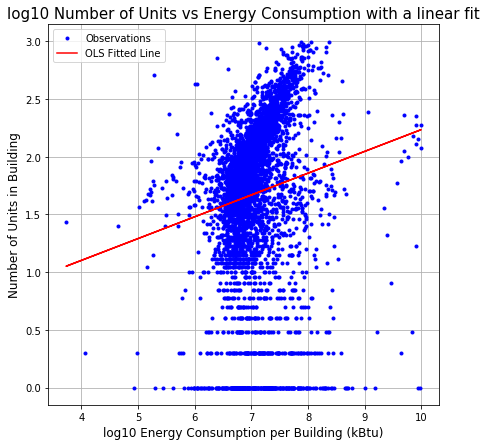

In [30]:
# Plotting the data and linear fit
plot7 = pl.figure(figsize=(7,7)).add_subplot(111);
plot7.plot(x,y,'b.', label ='Observations');
plot7.plot(x,smfit.fittedvalues, 'r-', label='OLS Fitted Line')
plot7.set_title('log10 Number of Units vs Energy Consumption with a linear fit', fontsize=15);
plot7.set_xlabel('log10 Energy Consumption per Building (kBtu)', fontsize=12);
plot7.set_ylabel('Number of Units in Building', fontsize=12);
plot7.grid(True)
plot7.legend();

**Figure 8**: A plot of log(number of units) vs log(energy consumed) on a regular (non-log) scale shown as blue dots. A linear fit is modeled for the data, shown as a red line. The linear fit does not appear to go through the data very well. A parabolic fit may be more appropriate.  

### Energy vs Units

In [31]:
# Perform the linear fit calculations
x = log10(merged2['UnitsTotal'])
y = log10(merged2['nrg'])
x2 = sm.add_constant(x)
smfit = smf.OLS(y, x2).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nrg   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     93.29
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           7.05e-22
Time:                        23:19:12   Log-Likelihood:                -3291.7
No. Observations:                4928   AIC:                             6587.
Df Residuals:                    4926   BIC:                             6600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.8744      0.018    374.550      0.000         6.838     6.910
UnitsTotal     0.0984      0.010      9.659      0.000         0.078     0.118
==============================================================================
Omnibus:                     1256.913   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10059.101
Skew:                           0.993   Prob(JB):                         0.00
Kurtosis:                       9.711   Cond. No.                         6.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

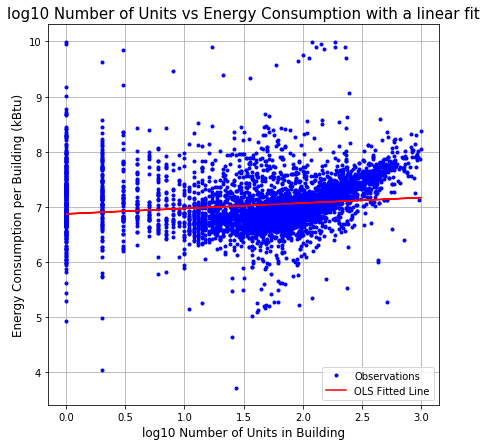

In [32]:
# Plotting the data and linear fit
plot8 = pl.figure(figsize=(7,7)).add_subplot(111);
plot8.plot(x,y,'b.', label ='Observations');
plot8.plot(x,smfit.fittedvalues, 'r-', label='OLS Fitted Line')
plot8.set_title('log10 Number of Units vs Energy Consumption with a linear fit', fontsize=15);
plot8.set_xlabel('log10 Number of Units in Building', fontsize=12);
plot8.set_ylabel('Energy Consumption per Building (kBtu)', fontsize=12);
plot8.grid(True)
plot8.legend();

**Figure 9**: A plot of log(energy consumed) vs log(number of units) on a regular (non-log) scale shown as blue dots. A linear fit is modeled for the data, shown as a red line. The linear fit appears to fit well (at least better than the fit in Figure 8), however there seems to be potential for an improved fit using a parabolic fit.

## Second degree polynomial fit

### Units vs Energy

In [33]:
# Calculate the second degree polynomial fit
merged2.sort_values(by='nrg', axis=0, inplace=True)
x = log10(merged2['nrg'])
x_sq = x**2
y = log10(merged2['UnitsTotal'])
fit_x2 = smf.ols(formula='y~x+x_sq', data=merged2).fit()
fit_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     90.27
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           3.15e-39
Time:                        23:19:13   Log-Likelihood:                -4854.7
No. Observations:                4928   AIC:                             9715.
Df Residuals:                    4925   BIC:                             9735.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.8300      0.787     -8.674      0.000        -8.374    -5.286
x              2.1812      0.216     10.091      0.000         1.757     2.605
x_sq          -0.1376      0.015     -9.254      0.000        -0.167    -0.108
==============================================================================
Omnibus:                      873.502   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1431.038
Skew:                          -1.201   Prob(JB):                    1.80e-311
Kurtosis:                       4.097   Cond. No.                     4.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

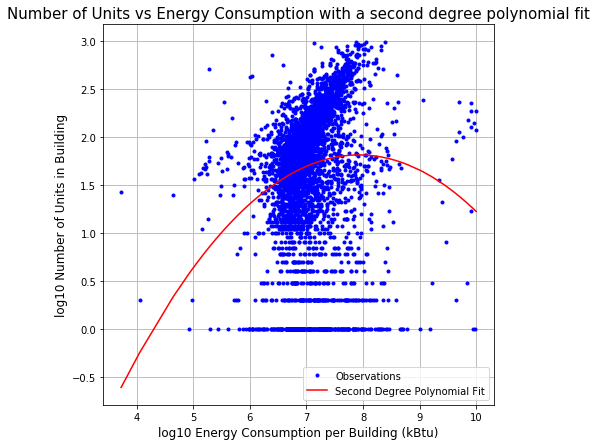

In [34]:
# Plotting the data and polynomial fit
y_pred = fit_x2.predict()

plot9 = pl.figure(figsize=(7,7)).add_subplot(111);
plot9.plot(x,y,'b.', label ='Observations');
plot9.plot(x,y_pred, 'r-', label='Second Degree Polynomial Fit')
plot9.set_title('Number of Units vs Energy Consumption with a second degree polynomial fit'
                , fontsize=15);
plot9.set_xlabel('log10 Energy Consumption per Building (kBtu)', fontsize=12);
plot9.set_ylabel('log10 Number of Units in Building', fontsize=12);
plot9.grid(True)
plot9.legend();

**Figure 10**: A plot of log(number of units) vs log(energy consumed) on a regular (non-log) scale shown as blue dots. A second degree polynomial fit is modeled for the data, shown as a red line. The polynomial fit does not appear to fit well. Therefore, neither the linear fit nor the polynomial fit are good fits visually when energy is on the y-axis and units are on the x-axis.

### Energy vs Units

In [35]:
# Calculate the second degree polynomial fit
merged2.sort_values(by='UnitsTotal', axis=0, inplace=True)
x = log10(merged2['UnitsTotal'])
x_sq = x**2
y = log10(merged2['nrg'])
fit_x2 = smf.ols(formula='y~x+x_sq', data=merged2).fit()
fit_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     462.5
Date:                Sat, 01 Dec 2018   Prob (F-statistic):          8.18e-185
Time:                        23:19:13   Log-Likelihood:                -2913.8
No. Observations:                4928   AIC:                             5834.
Df Residuals:                    4925   BIC:                             5853.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.2570      0.022    335.352      0.000         7.215     7.299
x             -0.7355      0.031    -23.977      0.000        -0.796    -0.675
x_sq           0.3129      0.011     28.572      0.000         0.291     0.334
==============================================================================
Omnibus:                     1409.556   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18017.884
Skew:                           1.000   Prob(JB):                         0.00
Kurtosis:                      12.151   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

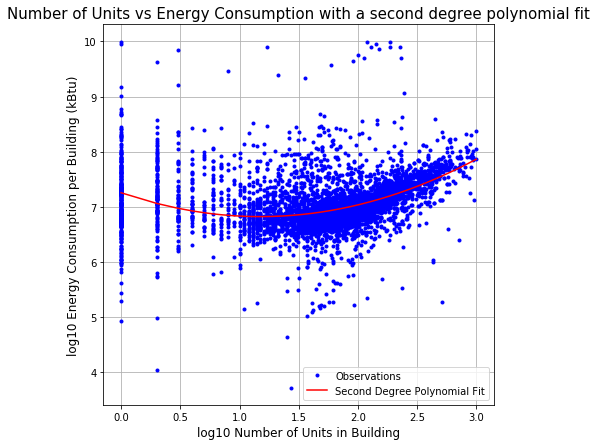

In [36]:
# Plotting the data and polynomial fit
y_pred = fit_x2.predict()

plot10 = pl.figure(figsize=(7,7)).add_subplot(111);
plot10.plot(x,y,'b.', label ='Observations');
plot10.plot(x,y_pred, 'r-', label='Second Degree Polynomial Fit')
plot10.set_title('Number of Units vs Energy Consumption with a second degree polynomial fit'
                , fontsize=15);
plot10.set_xlabel('log10 Number of Units in Building', fontsize=12);
plot10.set_ylabel('log10 Energy Consumption per Building (kBtu)', fontsize=12);
plot10.grid(True)
plot10.legend();

**Figure 11**: A plot of log(energy consumed) vs log(number of units) on a regular (non-log) scale shown as blue dots. A second degree polynomial fit is modeled for the data, shown as a red line. The polynomial fit appears to fit well.

## Calculate the chi square and likelihood of your model

### Define a chisquare function

In [51]:
# Define a chisquare function
def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    chistat = 0
    for i in model:
        chistat = chistat + (model[i] - data[i])**2 / errors[i]**2
    return chistat;

### Define and calculate errors

In [37]:
# Calculating and defining the errors of nrg
x1 = merged2['Reported Property Floor Area']
x2 = merged2['Site EUI(kBtu/ft2)']
e1 = sqrt(x1)
e2 = sqrt(x2)
e3 = sqrt(e1**2 + e2**2)
merged2['errorsnrg'] = sqrt(e3**2 / (x1*x2) / np.log(10))

# Calculating and defining the errors of units
xu = merged2.UnitsTotal
eu = sqrt(xu)
merged2['errorsunits'] = sqrt(eu / (xu*np.log(10)))

The largest error bar is for


,UnitsRes,UnitsTotal,YearBuilt,BBL,geometry,Site EUI(kBtu/ft2),Reported Property Floor Area,nrg,errorsnrg,errorsunits
3313,27,27,1909,1.019900e+09,"POLYGON ((994066.3934326172 234073.4490356445,...",0.1,53440.0,5344.0,2.083975,0.289102


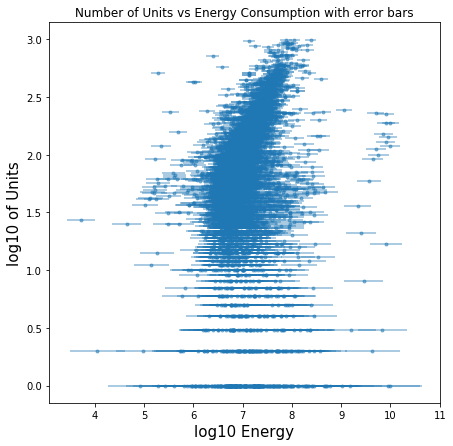

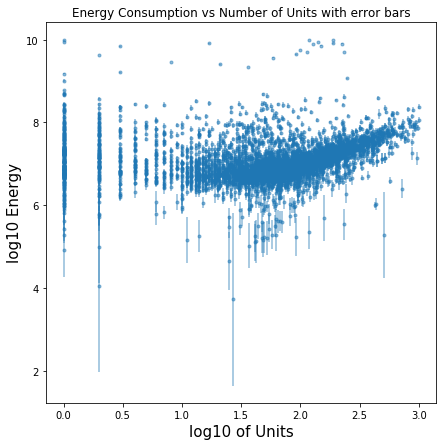

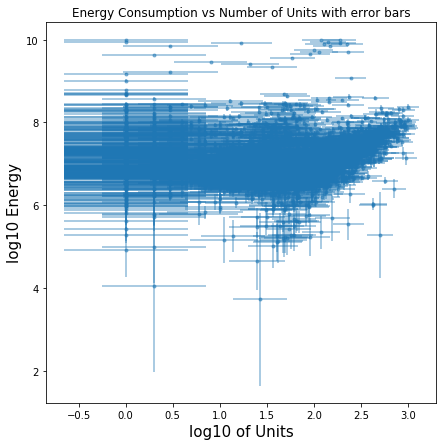

In [53]:
#I could also include errors for number of units

plot1 = pl.figure(figsize=(7,7)).add_subplot(111);
plot1.errorbar(np.log10(merged2.nrg), np.log10(merged2.UnitsTotal), 
             xerr=merged2.errorsunits, fmt='.',
             alpha=0.5);
plot1.set_xlabel('log10 Energy', fontsize=15);
plot1.set_ylabel('log10 of Units', fontsize=15);
plot1.set_title('Number of Units vs Energy Consumption with error bars');

plot2 = pl.figure(figsize=(7,7)).add_subplot(111);
plot2.errorbar(np.log10(merged2.UnitsTotal), np.log10(merged2.nrg), 
             yerr=merged2.errorsnrg, fmt='.',
             alpha=0.5);
plot2.set_xlabel('log10 of Units', fontsize=15);
plot2.set_ylabel('log10 Energy', fontsize=15);
plot2.set_title('Energy Consumption vs Number of Units with error bars');

plot2 = pl.figure(figsize=(7,7)).add_subplot(111);
plot2.errorbar(np.log10(merged2.UnitsTotal), np.log10(merged2.nrg), 
             yerr=merged2.errorsnrg, xerr=merged2.errorsunits, fmt='.',
             alpha=0.5);
plot2.set_xlabel('log10 of Units', fontsize=15);
plot2.set_ylabel('log10 Energy', fontsize=15);
plot2.set_title('Energy Consumption vs Number of Units with error bars');

print ("The largest error bar is for")
merged2[merged2.errorsnrg == merged2.errorsnrg.max()]

**Figure 12**: Above are three plots. The first is log10(units) vs log10(energy) with x errors, the second is log10(energy) vs log10(units) with y errors, and the third one is log10(energy) vs log10(units) with x and y errors. It is interesting to note that in the first plot, the error bars are larger for smaller values on the y-axis, in the second plot they are larger for smaller values on the x-axis, and in the third axis they are larger for smaller values on the x-axis and y-axis. The third plot shows that plotting both errors gives a visual representation of quite a bit of uncertainty in the data.

## Add the errors and calculate the chi square

In [ ]:
# Calculate the degrees of freedom
#degrees of freedom: number of observations - number of model parameters
# note: these are reported as dof of the residuals in the statsmodels fit summary, but jsut to make sure let's calculate them
dof = ...
print ("degrees of freedom:" , dof)

In [ ]:

print ("Units vs Energy residuals (no errors include): %.2f"%\
       (chi2(np.log10(bblnrgdataCut.UnitsTotal), linmodel_0.predict()) / 
        float(dof)))

print ("Units vs Energy chi square per DOF w independent variable error only: %.2f"%\
       (chi2(np.log10(bblnrgdataCut.UnitsTotal), linmodel_0.predict(), 
            errors = bblnrgdataCut.errorsnrg) / dof))

print ("Units vs Energy chi square per DOF : %.2f"%\
       (chi2(np.log10(bblnrgdataCut.UnitsTotal), linmodel_0.predict(), 
            errors = np.sqrt(bblnrgdataCut.errorsnrg**2 + 
                             bblnrgdataCut.errorsunits**2))  / dof))